##KELOMPOK 6##
###Anggota Kelompok:###
#####1. Whitney (2106700946)#####
#####2. Elsye Dianita Siahaan (2106725015)#####
#####3. Rachel Thyffani Margaretha S (2106726900)#####
#####4. Esly Vani Frasanti Saragih (2106700782)#####


**Imports**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from spacy.lang.en.stop_words import STOP_WORDS as stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
from scipy.linalg import svd
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option("display.max_colwidth", 200)

**Load Data**

In [ ]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data

In [ ]:
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt, seaborn as sns, numpy as np
sns.set(style="ticks", color_codes=True)

"Done"

'Done'

In [ ]:
# Look at the dataset
documents[:5]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
print("Total Documents: ", len(documents))

Total Documents:  11314


In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

**Preprocessing**

In [ ]:
news_df = pd.DataFrame({'document':documents})
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())                                                               

In [ ]:
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english', 
max_features= 1000, # keep top 1000 terms 
max_df = 0.5, 
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-ter

(11314, 1000)

In [ ]:
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

len(svd_model.components_)

20

In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [ ]:
from sklearn.manifold import TSNE
T0 = "like know people think good time thanks"
T1 = "thanks windows card drive mail file advance "
T2 = "game team year games season players good "
T3 = "drive scsi hard disk card drives problem "
T4 = "windows file window files program problem version"
T5 = "government space chip mail information data encryption"
T6 = "like bike chip sounds know looks look"
T7 = "card sale video monitor offer price jesus"
T8 = "know card chip video government people clipper"
T9 = "good know time bike problem jesus work"
T10 = "think good chip clipper need encryption people"
T11 = "thanks problem right bike good window time"
T12 = "good people windows know sale file files"
T13 = "space think know nasa problem year israel"
T14 = "space good card thanks people year nasa"
T15 = "people problem game window time work want"
T16 = "problem good window israel people know israeli"
T17 = "file time problem need files mail game"
T18 = "need right file card files want good"
T19 = "need time windows want israel window israeli"

T = [T1, T2, T3, T4, T5, T6, T7, T8, T9, T10, T11, T12, T13, T14, T15, T16, T17, T18,T19]


In [ ]:
vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
A = vsm.fit_transform(T)

A.shape

(19, 52)

In [ ]:
type(A)

scipy.sparse.csr.csr_matrix

In [ ]:
A.toarray()

array([[1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 0

In [ ]:
print(str(vsm.vocabulary_)[:93])

{'thanks': 42, 'windows': 49, 'card': 2, 'drive': 7, 'mail': 25, 'file': 10, 'advance': 0, 'g


In [ ]:
U, s, V = np.linalg.svd(A.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (19, 19) (19,) (52, 52)
[5.43048711 3.68257453 3.44749161 3.0095837  2.95281141 2.81386653
 2.70281043 2.66806271 2.41206861 2.34133807 2.20289088 2.16986264
 1.94804733 1.84837161 1.70850314 1.55792081 1.42565669 1.1626439
 1.06878626]


In [ ]:
x_kata = V[0,:] # Baris pertama matrix V = sumbu x kata
y_kata = V[1,:] # Baris kedua matrix V = sumbu y kata

# label dari setiap barisnya = kata-kata
# kita akan gunakan perintah yang sama dengan di segmen sebelum ini
print(vsm.vocabulary_)

{'thanks': 42, 'windows': 49, 'card': 2, 'drive': 7, 'mail': 25, 'file': 10, 'advance': 0, 'game': 12, 'team': 41, 'year': 51, 'games': 13, 'season': 38, 'players': 31, 'good': 14, 'scsi': 37, 'hard': 16, 'disk': 6, 'drives': 8, 'problem': 33, 'window': 48, 'files': 11, 'program': 34, 'version': 45, 'government': 15, 'space': 40, 'chip': 3, 'information': 17, 'data': 5, 'encryption': 9, 'like': 22, 'bike': 1, 'sounds': 39, 'know': 21, 'looks': 24, 'look': 23, 'sale': 36, 'video': 46, 'monitor': 26, 'offer': 29, 'price': 32, 'jesus': 20, 'people': 30, 'clipper': 4, 'time': 44, 'work': 50, 'think': 43, 'need': 28, 'right': 35, 'nasa': 27, 'israel': 18, 'want': 47, 'israeli': 19}


In [ ]:
idx_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [idx_kata[i] for i in range(A.shape[0])]
print(Label)

['advance', 'bike', 'card', 'chip', 'clipper', 'data', 'disk', 'drive', 'drives', 'encryption', 'file', 'files', 'game', 'games', 'good', 'government', 'hard', 'information', 'israel']


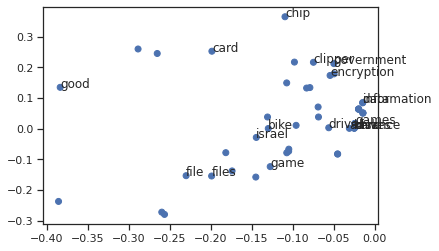

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))

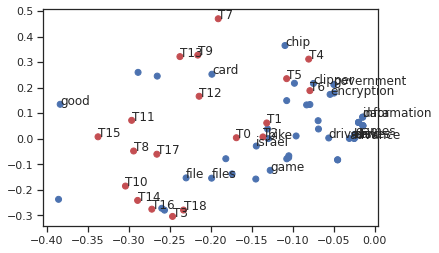

In [ ]:
x_judul = U[:,0] # Kolom pertama matrix U = sumbu x judul
y_judul = U[:,1] # Kolom kedua matrix U = sumbu y judul

Label_judul = ['T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18']

fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))
    

ax.scatter(x_judul, y_judul, c=['r']*len(x_judul))
for i, L in enumerate(Label_judul):
    ax.annotate(L, (x_judul[i],y_judul[i]))


In [ ]:
X_topics = svd_model.fit_transform(X)
embedding = TSNE(n_components=2).fit_transform(X_topics)


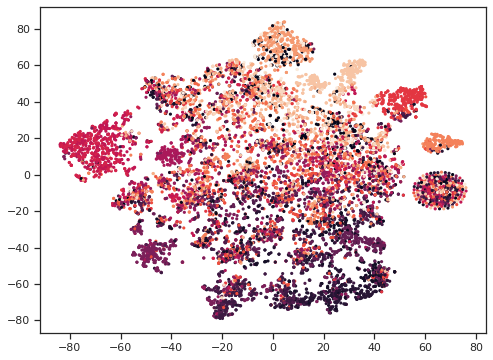

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

##KESIMPULAN##

Implementasi topic modelling pada 20 data newsgroup dilakukan dengan terlebih dahulu mengimport fungsi yang diperlukan, kemudian load dan preprocessing data hingga nantinya akan dibentuk sebuah plot (dalam tugas kali ini berbentuk scatter plot) yang akan menunjukkan topik yang sedang dibicarakan pada data tersebut.
